Entrega : 01

Grupo : 07

# Load

In [52]:
import os
from pathlib import Path 
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns
# pre processing categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# Ruta Maria
#path_proyecto ='/content/drive/MyDrive/Machine Learning_Entregables/Entregable 1/data_inter' #### Ruta a cambiar

# os.chdir(path_proyecto)
# os.getcwd()

In [18]:
# # Ruta Eliane
# path_proyecto ='/content/drive/MyDrive/2026/2026-0/Machine learning/data_inter' #### Ruta a cambiar

# os.chdir(path_proyecto)
# os.getcwd()

In [19]:
# Obtener directorio base (Grupo07) - subir un nivel desde scripts
BASE_DIR = Path(__file__).parent.parent if '__file__' in dir() else Path.cwd().parent

# Si estamos en scripts, subir un nivel; si no, usar cwd
if "scripts" in str(Path.cwd()):
    BASE_DIR = Path.cwd().parent
else:
    BASE_DIR = Path.cwd()

print(f"BASE_DIR: {BASE_DIR}")

# Rutas para datos
DATA_DIR = BASE_DIR / "data"
RAW_DATA_PATH = DATA_DIR / "raw"
INTER_DATA_PATH = DATA_DIR / "inter"
FINAL_DATA_PATH = DATA_DIR / "final"
# Rutas para gráficos, scripts y documentación
GRAPHS_PATH = BASE_DIR / "graphs"
SCRIPTS_PATH = BASE_DIR / "scripts"
DOCS_PATH = BASE_DIR / "docs"

print(f"RAW_DATA_PATH: {RAW_DATA_PATH}")
print(f"Existe: {RAW_DATA_PATH.exists()}")

BASE_DIR: c:\Users\leydi\Documents\Machine-Learning-para-Finanzas_2026_0\Grupo07
RAW_DATA_PATH: c:\Users\leydi\Documents\Machine-Learning-para-Finanzas_2026_0\Grupo07\data\raw
Existe: True


In [20]:
# cargando datos
df_income_raw = pd.read_excel(RAW_DATA_PATH / "income_dataset.xlsx")

In [21]:
df_income_raw.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [22]:
df_income_raw

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


# EDA

Análisis inicial

In [23]:
print(df_income_raw.shape)

(10000, 14)


In [24]:
df_income_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

## 1. Análisis estadístico inicial

In [25]:
TARGET_REG = "Income"  # variable objetivo para regresión

# selecciona las columnas numéricas y categóricas excepto la variable objetivo

df_reg = df_income_raw.copy()
num_reg= df_reg.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_reg = df_reg.select_dtypes(include=['object', "category", "bool"]).columns.tolist()
num_reg.remove(TARGET_REG)


print("=== Variables Identificadas ===")
print("Target de regresión:", TARGET_REG)
print("Variables numéricas para regresión:", num_reg)
print("Variables categóricas para regresión:", cat_reg)
print("--------------------------------")

=== Variables Identificadas ===
Target de regresión: Income
Variables numéricas para regresión: ['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']
Variables categóricas para regresión: ['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']
--------------------------------


### 1.1) Numéricas - descriptivas

In [78]:
def eda_numericas_descriptivas(df, num_cols, top_n=5):
    """
    Realiza EDA descriptivo para variables numéricas.

    Args:
        df: DataFrame a analizar
        num_cols: Lista de columnas numéricas
        top_n: Número de valores más frecuentes a mostrar
    """
    print("=" * 50)
    print("ESTADÍSTICAS DESCRIPTIVAS")
    print("=" * 50)
    display(df[num_cols].describe().T.round(2))

    num_cols = df.select_dtypes(include="number").columns.tolist()


    # if TARGET_REG in num_cols:
    #     num_cols.remove(TARGET_REG)

    if "index" in num_cols:
        num_cols.remove("index")

    if len(num_cols) > 0:
        desc_num = df[num_cols].describe().T
        print("\nEstadísticos descriptivos (numéricas)")
        display(desc_num)

    print("\n" + "=" * 50)
    print("QUANTILES (1%, 25%, 50%, 75%, 99%)")
    print("=" * 50)
    display(df[num_cols].quantile([0.01, 0.25, 0.5, 0.75, 0.99]).T.round(2))

    print("\n" + "=" * 50)
    print("VALORES NULOS")
    print("=" * 50)
    print(df[num_cols].isna().sum())

    print("\n" + "=" * 50)
    print(f"TOP {top_n} VALORES MÁS FRECUENTES POR VARIABLE")
    print("=" * 50)
    for col in num_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts().head(top_n).round(2))

In [79]:
# regresión
eda_numericas_descriptivas(df_reg, num_reg)

ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
Age,10000.0,44.02,15.20,18.0,31.0,44.0,57.0,70.0
Number_of_Dependents,10000.0,2.53,1.71,0.0,1.0,3.0,4.0,5.0
Work_Experience,10000.0,24.86,14.65,0.0,12.0,25.0,37.0,50.0
Household_Size,10000.0,3.99,2.01,1.0,2.0,4.0,6.0,7.0



Estadísticos descriptivos (numéricas)


,count,mean,std,min,25%,50%,75%,max
Age,10000.0,44.0217,1.520400e+01,18.0,31.0,44.0,57.0,70.0
Number_of_Dependents,10000.0,2.5270,1.713991e+00,0.0,1.0,3.0,4.0,5.0
Work_Experience,10000.0,24.8588,1.465262e+01,0.0,12.0,25.0,37.0,50.0
Household_Size,10000.0,3.9896,2.010496e+00,1.0,2.0,4.0,6.0,7.0
Income,10000.0,816838.1667,1.821089e+06,31044.0,68446.0,72943.0,350667.5,9992571.0



QUANTILES (1%, 25%, 50%, 75%, 99%)


,0.01,0.25,0.50,0.75,0.99
Age,18.00,31.0,44.0,57.0,70.00
Number_of_Dependents,0.00,1.0,3.0,4.0,5.00
Work_Experience,0.00,12.0,25.0,37.0,50.00
Household_Size,1.00,2.0,4.0,6.0,7.00
Income,36121.95,68446.0,72943.0,350667.5,8836918.82



VALORES NULOS
Age                     0
Number_of_Dependents    0
Work_Experience         0
Household_Size          0
Income                  0
dtype: int64

TOP 5 VALORES MÁS FRECUENTES POR VARIABLE

--- Age ---
Age
43    223
66    216
62    215
40    212
64    209
Name: count, dtype: int64

--- Number_of_Dependents ---
Number_of_Dependents
5    1745
3    1712
1    1651
0    1642
4    1629
Name: count, dtype: int64

--- Work_Experience ---
Work_Experience
2     224
44    221
48    219
24    218
33    216
Name: count, dtype: int64

--- Household_Size ---
Household_Size
1    1477
3    1445
6    1437
7    1433
5    1411
Name: count, dtype: int64

--- Income ---
Income
74306    10
71180     7
66950     6
72296     6
74294     6
Name: count, dtype: int64


### 1.2) Categóricas - frecuencias

In [28]:
def eda_categoricas_descriptivas(df, cat_cols, top_n=10):
    """
    Realiza EDA descriptivo para variables categóricas.

    Args:
        df: DataFrame a analizar
        cat_cols: Lista de columnas categóricas
        top_n: Número de categorías más frecuentes a mostrar
    """
    print("=" * 50)
    print("VALORES ÚNICOS POR VARIABLE")
    print("=" * 50)
    display(df[cat_cols].nunique().to_frame("n_unique"))

    print("\n" + "=" * 50)
    print("VALORES NULOS")
    print("=" * 50)
    print(df[cat_cols].isna().sum())

    print("\n" + "=" * 50)
    print(f"TOP {top_n} FRECUENCIAS POR VARIABLE")
    print("=" * 50)
    for col in cat_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False).head(top_n))

In [29]:
# regresión
eda_categoricas_descriptivas(df_reg, cat_reg)

VALORES ÚNICOS POR VARIABLE


,n_unique
Education_Level,4
Occupation,5
Location,3
Marital_Status,3
Employment_Status,3
Homeownership_Status,2
Type_of_Housing,3
Gender,2
Primary_Mode_of_Transportation,4



VALORES NULOS
Education_Level                   0
Occupation                        0
Location                          0
Marital_Status                    0
Employment_Status                 0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
dtype: int64

TOP 10 FRECUENCIAS POR VARIABLE

--- Education_Level ---
Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64

--- Occupation ---
Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64

--- Location ---
Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64

--- Marital_Status ---
Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64

--- Employment_Status ---
Employment_Status
Full-time        5004
Part-time        3016
Self-em

## 2. Análisis de calidad (diagnóstico)

### 2.1) Numéricas

In [30]:
def eda_calidad_numericas(df, num_cols, nombre_dataset="Dataset"):
    """
    Realiza análisis de calidad (diagnóstico) para variables numéricas.

    Args:
        df: DataFrame a analizar
        num_cols: Lista de columnas numéricas
        nombre_dataset: Nombre del dataset para identificación
    """
    print("=" * 50)
    print(f"ANÁLISIS DE CALIDAD - {nombre_dataset}")
    print("=" * 50)

    print("\nVariables numéricas analizadas:")
    print(num_cols)

    # 1) Información general
    print("\n" + "=" * 50)
    print("INFORMACIÓN GENERAL (dtypes, nulos)")
    print("=" * 50)
    df[num_cols].info()

    # 2) Diagnóstico de dtypes incorrectos
    print("\n" + "=" * 50)
    print("DIAGNÓSTICO DE DTYPES INCORRECTOS")
    print("=" * 50)

    dtype_rows = []
    for col in num_cols:
        serie_original = df[col]
        serie_coerce = pd.to_numeric(serie_original, errors="coerce")

        dtype_rows.append({
            "variable": col,
            "dtype_original": serie_original.dtype,
            "NaN_antes": serie_original.isna().sum(),
            "NaN_despues_coerce": serie_coerce.isna().sum(),
            "valores_no_numericos": serie_coerce.isna().sum() - serie_original.isna().sum()
        })

    dtype_diag = pd.DataFrame(dtype_rows)
    display(dtype_diag)

    # 3) Análisis de missings redondeado a 2 decimales

    print("\n" + "=" * 50)
    print("ANÁLISIS DE MISSINGS")
    print("=" * 50)

    missing_num = (
        df[num_cols]
        .isna()
        .mean()
        .round(2)
        .sort_values(ascending=False)
        .to_frame("pct_missing")
    )
    display(missing_num)

    # 4) Análisis de outliers
    print("\n" + "=" * 50)
    print("ANÁLISIS DE OUTLIERS")
    print("=" * 50)

    quantiles_num = df[num_cols].quantile([0.01, 0.50, 0.99]).T
    quantiles_num.columns = ["p1", "p50", "p99"]

    min_max_num = df[num_cols].agg(["min", "max"]).T

    outliers_num = pd.concat([min_max_num, quantiles_num], axis=1)
    outliers_num = outliers_num[["min", "p1", "p50", "p99", "max"]]
    display(outliers_num)

    # 5) Análisis de duplicados
    print("\n" + "=" * 50)
    print("ANÁLISIS DE DUPLICADOS")
    print("=" * 50)

    n_duplicados = df.duplicated().sum()
    print(f"Número de filas duplicadas: {n_duplicados}")

In [31]:
eda_calidad_numericas(df_reg,num_reg, "Dataset de Regresión")

ANÁLISIS DE CALIDAD - Dataset de Regresión

Variables numéricas analizadas:
['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

INFORMACIÓN GENERAL (dtypes, nulos)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   10000 non-null  int64
 1   Number_of_Dependents  10000 non-null  int64
 2   Work_Experience       10000 non-null  int64
 3   Household_Size        10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB

DIAGNÓSTICO DE DTYPES INCORRECTOS


,variable,dtype_original,NaN_antes,NaN_despues_coerce,valores_no_numericos
0,Age,int64,0,0,0
1,Number_of_Dependents,int64,0,0,0
2,Work_Experience,int64,0,0,0
3,Household_Size,int64,0,0,0



ANÁLISIS DE MISSINGS


,pct_missing
Age,0.0
Number_of_Dependents,0.0
Work_Experience,0.0
Household_Size,0.0



ANÁLISIS DE OUTLIERS


,min,p1,p50,p99,max
Age,18,18.0,44.0,70.0,70
Number_of_Dependents,0,0.0,3.0,5.0,5
Work_Experience,0,0.0,25.0,50.0,50
Household_Size,1,1.0,4.0,7.0,7



ANÁLISIS DE DUPLICADOS
Número de filas duplicadas: 0


### 2.2) Categóricas

In [32]:
def eda_calidad_categoricas(df, cat_cols, nombre_dataset="Dataset", umbral_low_freq=0.01):
    """
    Realiza análisis de calidad (diagnóstico) para variables categóricas.

    Args:
        df: DataFrame a analizar
        cat_cols: Lista de columnas categóricas
        nombre_dataset: Nombre del dataset para identificación
        umbral_low_freq: Umbral para detectar categorías con baja frecuencia (default 1%)
    """
    print("=" * 50)
    print(f"ANÁLISIS DE CALIDAD CATEGÓRICAS - {nombre_dataset}")
    print("=" * 50)

    print("\nVariables categóricas analizadas:")
    print(cat_cols)

    # 1) Análisis de missings
    print("\n" + "=" * 50)
    print("ANÁLISIS DE MISSINGS")
    print("=" * 50)

    missing_cat = (
        df[cat_cols]
        .isna()
        .mean()
        .round(2)
        .sort_values(ascending=False)
        .to_frame("pct_missing")
    )
    display(missing_cat)

    # 2) Análisis de missings codificados
    print("\n" + "=" * 50)
    print("MISSINGS CODIFICADOS (vacíos, '?')")
    print("=" * 50)

    rows_missing_cod = []
    for col in cat_cols:
        conteo_vacio = (df[col].astype(str).str.strip() == "").sum()
        conteo_preg = (df[col].astype(str).str.strip() == "?").sum()

        rows_missing_cod.append({
            "variable": col,
            "empty_string": conteo_vacio,
            "question_mark": conteo_preg
        })

    missing_cod = pd.DataFrame(rows_missing_cod)
    display(missing_cod)

    # 3) Categorías con baja frecuencia
    print("\n" + "=" * 50)
    print(f"CATEGORÍAS CON FRECUENCIA < {umbral_low_freq*100:.0f}%")
    print("=" * 50)

    rows_low_freq = []
    for col in cat_cols:
        freq = df[col].value_counts(normalize=True)
        low_freq = freq[freq < umbral_low_freq]

        for categoria, propor in low_freq.items():
            rows_low_freq.append({
                "variable": col,
                "categoria": categoria,
                "frecuencia_relativa": round(propor, 4)
            })

    low_freq_df = pd.DataFrame(rows_low_freq)

    if low_freq_df.empty:
        print("No se identificaron categorías con baja frecuencia.")
    else:
        display(low_freq_df)

In [33]:
# regresión
eda_calidad_categoricas(df_reg, cat_reg, "Dataset de Regresión")

ANÁLISIS DE CALIDAD CATEGÓRICAS - Dataset de Regresión

Variables categóricas analizadas:
['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']

ANÁLISIS DE MISSINGS


,pct_missing
Education_Level,0.0
Occupation,0.0
Location,0.0
Marital_Status,0.0
Employment_Status,0.0
Homeownership_Status,0.0
Type_of_Housing,0.0
Gender,0.0
Primary_Mode_of_Transportation,0.0



MISSINGS CODIFICADOS (vacíos, '?')


,variable,empty_string,question_mark
0,Education_Level,0,0
1,Occupation,0,0
2,Location,0,0
3,Marital_Status,0,0
4,Employment_Status,0,0
5,Homeownership_Status,0,0
6,Type_of_Housing,0,0
7,Gender,0,0
8,Primary_Mode_of_Transportation,0,0



CATEGORÍAS CON FRECUENCIA < 1%
No se identificaron categorías con baja frecuencia.


## 3) Preprocesamiento

#### 3.1) Numéricas

In [34]:
df_reg_inter = df_reg.copy()

In [35]:
def imputar_missings_numericas(df, num_cols, estrategia="median"):
    """
    Imputa missings en variables numéricas.

    Args:
        df: DataFrame a procesar
        num_cols: Lista de columnas numéricas
        estrategia: Estrategia de imputación ("mean", "median", "zero")

    Returns:
        DataFrame con resumen de imputación
    """
    resumen = []

    for col in num_cols:
        n_missing = df[col].isna().sum()
        pct_missing = df[col].isna().mean() * 100

        if estrategia == "mean":
            valor_imputar = df[col].mean()
        elif estrategia == "median":
            valor_imputar = df[col].median()
        elif estrategia == "zero":
            valor_imputar = 0
        else:
            raise ValueError("Estrategia no reconocida. Use 'mean', 'median' o 'zero'.")

        df[col].fillna(valor_imputar, inplace=True)

        resumen.append({
            "variable": col,
            "n_missings_imputados": n_missing,
            "pct_missings_imputados": round(pct_missing, 2),
            "valor_imputado": round(valor_imputar, 4)
        })

    resumen_df = pd.DataFrame(resumen)

    print(f"Estrategia usada: {estrategia}")

    return resumen_df

In [36]:
imputar_missings_numericas(df_reg_inter, num_reg, estrategia="median")

Estrategia usada: median


C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\3772865827.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(valor_imputar, inplace=True)


,variable,n_missings_imputados,pct_missings_imputados,valor_imputado
0,Age,0,0.0,44.0
1,Number_of_Dependents,0,0.0,3.0
2,Work_Experience,0,0.0,25.0
3,Household_Size,0,0.0,4.0


In [37]:
def transformar_log(df, cols):
    """
    Aplica transformación log(1+x) para reducir sesgo/colas.
    Usa FunctionTransformer de sklearn.

    Args:
        df: DataFrame a procesar
        cols: Nombre de columna (str) o lista de columnas a transformar
    """
    # Convertir a lista si es string
    if isinstance(cols, str):
        cols = [cols]

    log_transformer = FunctionTransformer(np.log1p, validate=True)

    print("Columnas transformadas (log):")
    for col in cols:
        sesgo_antes = df[col].skew()
        df[col] = log_transformer.transform(df[[col]]).flatten()
        sesgo_despues = df[col].skew()

        print(f"  {col}: sesgo {sesgo_antes:.4f} -> {sesgo_despues:.4f}")

Skew (sesgo) es una medida de asimetría de la distribución de datos:

- Skew = 0: distribución simétrica
- Skew > 0: cola derecha más larga (sesgo positivo)
- Skew < 0: cola izquierda más larga (sesgo negativo)

In [38]:
# dataset regresión
# columnas: income
transformar_log(df_reg_inter, "Income")

Columnas transformadas (log):
  Income: sesgo 2.9832 -> 1.3452


c:\Users\leydi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


#### 3.2) Categóricas

In [39]:
def limpiar_strip_categoricas(df, cat_cols):
    """
    Aplica strip() para unificar categorías (elimina espacios).

    Args:
        df: DataFrame a procesar
        cat_cols: Lista de columnas categóricas
    """
    print("Limpieza strip - Unificar categorías:")
    for col in cat_cols:
        nunique_antes = df[col].nunique()
        df[col] = df[col].astype(str).str.strip()
        nunique_despues = df[col].nunique()

        print(f"  {col}: nunique {nunique_antes} -> {nunique_despues}")

In [40]:
def reemplazar_interrogacion_nan(df, cat_cols):
    """
    Reemplaza '?' por NaN (missing codificado).

    Args:
        df: DataFrame a procesar
        cat_cols: Lista de columnas categóricas
    """
    print("Reemplazo '?' -> NaN:")
    for col in cat_cols:
        conteo_antes = (df[col].astype(str).str.strip() == "?").sum()
        df[col] = df[col].replace("?", np.nan)

        print(f"  {col}: {conteo_antes} '?' reemplazados")

In [41]:
def imputar_missing_categoricas(df, cat_cols, valor="Missing"):
    """
    Imputa missings en categóricas con valor constante.
    Usa SimpleImputer(strategy='constant').

    Args:
        df: DataFrame a procesar
        cat_cols: Lista de columnas categóricas
        valor: Valor para imputar (default "Missing")
    """
    imputer = SimpleImputer(strategy="constant", fill_value=valor)

    print(f"Imputación con '{valor}':")
    for col in cat_cols:
        missing_antes = df[col].isna().sum()
        df[col] = imputer.fit_transform(df[[col]]).flatten()
        missing_despues = df[col].isna().sum()

        print(f"  {col}: missing {missing_antes} -> {missing_despues}")

In [42]:
# regresión - limpieza y reemplazo
limpiar_strip_categoricas(df_reg_inter, cat_reg)
reemplazar_interrogacion_nan(df_reg_inter, cat_reg)
imputar_missing_categoricas(df_reg_inter, cat_reg)

Limpieza strip - Unificar categorías:
  Education_Level: nunique 4 -> 4
  Occupation: nunique 5 -> 5
  Location: nunique 3 -> 3
  Marital_Status: nunique 3 -> 3


  Employment_Status: nunique 3 -> 3
  Homeownership_Status: nunique 2 -> 2
  Type_of_Housing: nunique 3 -> 3
  Gender: nunique 2 -> 2
  Primary_Mode_of_Transportation: nunique 4 -> 4
Reemplazo '?' -> NaN:
  Education_Level: 0 '?' reemplazados
  Occupation: 0 '?' reemplazados
  Location: 0 '?' reemplazados
  Marital_Status: 0 '?' reemplazados
  Employment_Status: 0 '?' reemplazados
  Homeownership_Status: 0 '?' reemplazados
  Type_of_Housing: 0 '?' reemplazados
  Gender: 0 '?' reemplazados
  Primary_Mode_of_Transportation: 0 '?' reemplazados
Imputación con 'Missing':
  Education_Level: missing 0 -> 0
  Occupation: missing 0 -> 0
  Location: missing 0 -> 0
  Marital_Status: missing 0 -> 0
  Employment_Status: missing 0 -> 0
  Homeownership_Status: missing 0 -> 0
  Type_of_Housing: missing 0 -> 0
  Gender: missing 0 -> 0
  Primary_Mode_of_Transportation: missing 0 -> 0


**Nota:** LabelEncoder y OneHotEncoder se aplicarán solo a variables con pocas categorías en etapas posteriores del modelado.

## 4) Análisis Exploratorio (EDA univariado) y Visualización

#### 4.1) Numéricas: descriptivo y visualización

In [74]:
def eda_univariado_numericas(df, num_cols, nombre_dataset="Dataset"):
    print("\n====================================")
    print(f"Dataset: {nombre_dataset}")
    print("4.1) EDA UNIVARIADO — VARIABLES NUMÉRICAS")
    print("====================================")

    print("\nVariables numéricas analizadas:")
    print(num_cols)

      # -------------------------
    # Parámetros visuales automáticos
    # -------------------------
    n_vars = len(num_cols)
    n_cols = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols)

    # -------------------------
    # Histogramas
    # -------------------------
    print("\n--- Histogramas ---")
    plt.figure(figsize=(5*n_cols, 3.5*n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Histograma de {col}", fontsize=11)
        plt.xlabel("")
        plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

    # -------------------------
    # Raw vs Log (si aplica)
    # -------------------------
    print("\n--- Comparación Raw vs Log ---")
    
    # Identificar columnas que fueron transformadas (asumiendo que df_reg es el df original)
    # En este notebook, solo 'Income' se transforma.
    cols_transformadas = [col for col in ["Income"] if col in df.columns and col in df_reg.columns]

    if not cols_transformadas:
        print("No se aplicaron transformaciones logarítmicas para comparar en las variables de entrada.")
    else:
        for col in cols_transformadas:
            plt.figure(figsize=(12, 4))

            # Gráfico Raw
            plt.subplot(1, 2, 1)
            sns.histplot(df_reg[col], bins=30, kde=True)
            plt.title(f'Raw: {col} (skew: {df_reg[col].skew():.2f})')
            plt.xlabel("")

            # Gráfico Log
            plt.subplot(1, 2, 2)
            sns.histplot(df[col], bins=30, kde=True)
            plt.title(f'Log: {col} (skew: {df[col].skew():.2f})')
            plt.xlabel("")

            plt.tight_layout()
            plt.show()


    # -------------------------
    # Boxplots
    # -------------------------
    print("\n--- Boxplots ---")
    plt.figure(figsize=(5*n_cols, 2.8*n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot de {col}", fontsize=11)
        plt.xlabel("")

    plt.tight_layout()
    plt.show()

    # -------------------------
    # Barplots para variables discretas
    # -------------------------
    print("\n--- Barplots (variables discretas) ---")
    discretas = [col for col in num_cols if df[col].nunique() <= 15]

    if discretas:
        n_vars_d = len(discretas)
        n_cols_d = min(n_cols, n_vars_d)
        n_rows_d = math.ceil(n_vars_d / n_cols_d)

        plt.figure(figsize=(5*n_cols_d, 3.5*n_rows_d))

        for i, col in enumerate(discretas, 1):
            plt.subplot(n_rows_d, n_cols_d, i)
            counts = df[col].value_counts().sort_index()
            sns.barplot(x=counts.index.astype(str), y=counts.values)
            plt.title(f"Barplot de {col}", fontsize=11)
            plt.xlabel("")
            plt.ylabel("Frecuencia")

        plt.tight_layout()
        plt.show()
    else:
        print("No se identificaron variables numéricas discretas.")

Text(0.5, 0, 'Income (log transformado)')

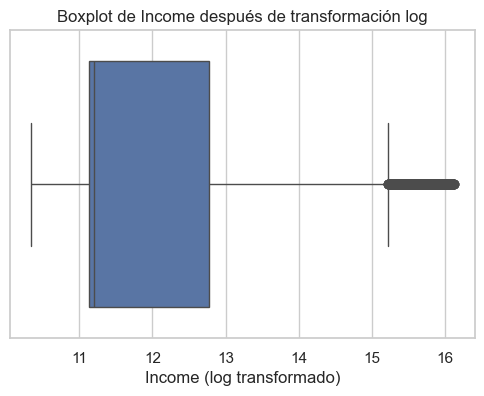

In [80]:
# bloxplot de income
plt.figure(figsize=(6,4))
sns.boxplot(x=df_reg_inter["Income"])   
plt.title("Boxplot de Income después de transformación log")
plt.xlabel("Income (log transformado)") 


Dataset: Dataset de Regresión
4.1) EDA UNIVARIADO — VARIABLES NUMÉRICAS

Variables numéricas analizadas:
['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size']

--- Histogramas ---


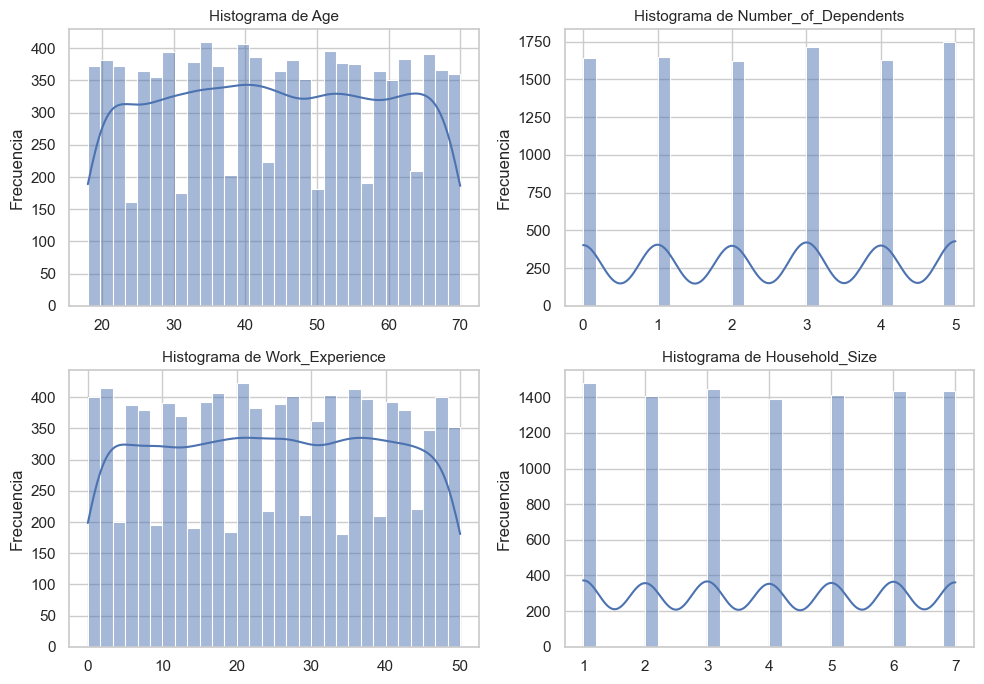


--- Comparación Raw vs Log ---


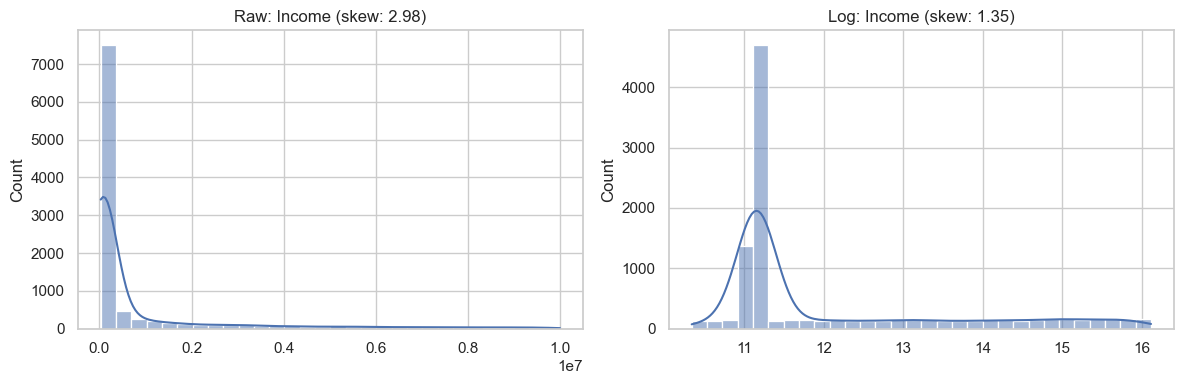


--- Boxplots ---


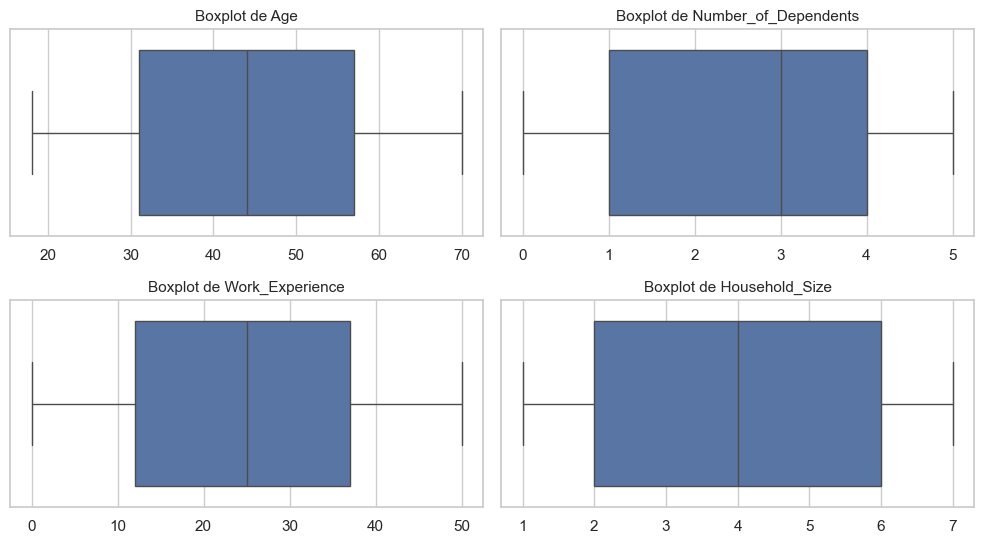


--- Barplots (variables discretas) ---


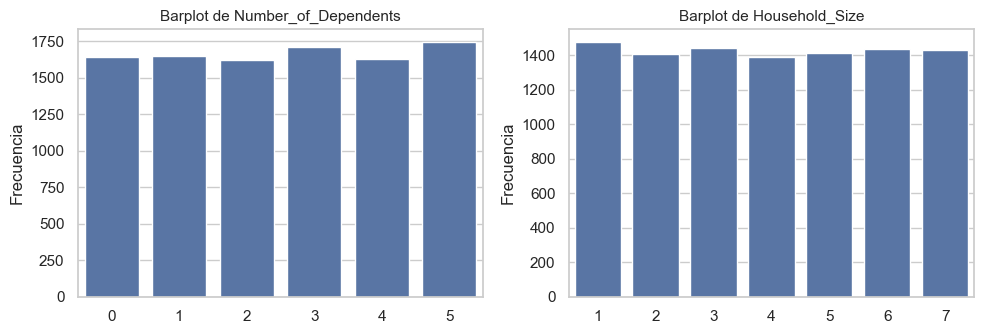

In [75]:
eda_univariado_numericas(df_reg_inter, num_reg, "Dataset de Regresión")

#### 4.2) Categóricas: frecuencias y visualización

In [49]:
def eda_univariado_categoricas(df, nombre_dataset="Dataset"):
    print("\n====================================")
    print(f"Dataset: {nombre_dataset}")
    print("4.2) EDA UNIVARIADO — VARIABLES CATEGÓRICAS")
    print("====================================")

    # Identificar variables categóricas
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    print("\nVariables categóricas analizadas:")
    print(cat_cols)

    if not cat_cols:
        print("No se identificaron variables categóricas.")
        return

    # -------------------------
    # Parámetros visuales automáticos
    # -------------------------
    n_vars = len(cat_cols)
    n_cols = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols)

    # =============================
    # COUNT PLOTS (Top 10)
    # =============================
    print("\n--- Countplots (Top 10 categorías) ---")

    plt.figure(figsize=(6*n_cols, 3.5*n_rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)

        order = df[col].value_counts().head(10).index

        sns.countplot(
            y=col,
            data=df,
            order=order
        )

        plt.title(f"Top 10 categorías — {col}", fontsize=11)
        plt.xlabel("Frecuencia")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

    # =============================
    # TABLAS DE FRECUENCIAS (Top 10)
    # =============================
    print("\n--- Tablas de frecuencia (Top 10) ---")

    for col in cat_cols:
        print(f"\nVariable categórica: {col}")

        freq_table = (
            df[col]
            .value_counts(dropna=False)
            .to_frame("frecuencia")
        )

        freq_table["frecuencia_relativa"] = (
            freq_table["frecuencia"] / freq_table["frecuencia"].sum()
        ).round(3)

        display(freq_table.head(10))


Dataset: Dataset de Regresión
4.2) EDA UNIVARIADO — VARIABLES CATEGÓRICAS

Variables categóricas analizadas:
['Education_Level', 'Occupation', 'Location', 'Marital_Status', 'Employment_Status', 'Homeownership_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']

--- Countplots (Top 10 categorías) ---


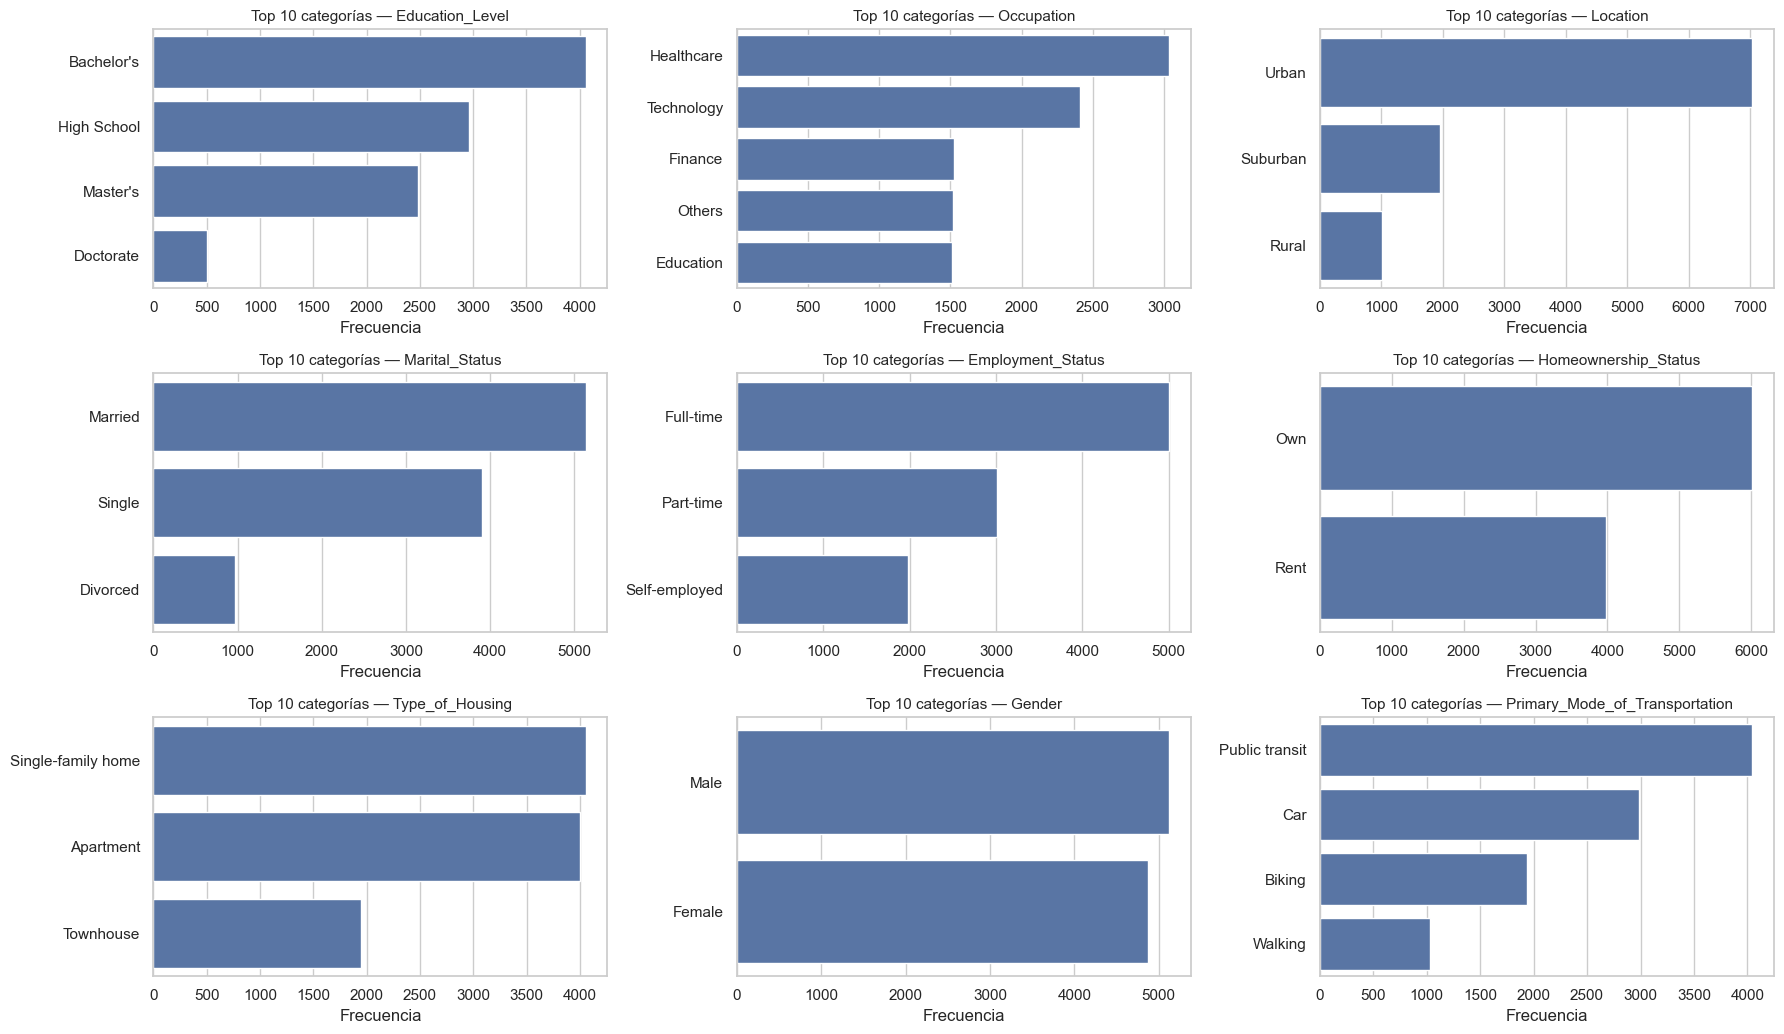


--- Tablas de frecuencia (Top 10) ---

Variable categórica: Education_Level


,frecuencia,frecuencia_relativa
Education_Level,,
Bachelor's,4058,0.406
High School,2959,0.296
Master's,2482,0.248
Doctorate,501,0.050



Variable categórica: Occupation


,frecuencia,frecuencia_relativa
Occupation,,
Healthcare,3035,0.304
Technology,2407,0.241
Finance,1525,0.152
Others,1521,0.152
Education,1512,0.151



Variable categórica: Location


,frecuencia,frecuencia_relativa
Location,,
Urban,7037,0.704
Suburban,1951,0.195
Rural,1012,0.101



Variable categórica: Marital_Status


,frecuencia,frecuencia_relativa
Marital_Status,,
Married,5136,0.514
Single,3900,0.390
Divorced,964,0.096



Variable categórica: Employment_Status


,frecuencia,frecuencia_relativa
Employment_Status,,
Full-time,5004,0.500
Part-time,3016,0.302
Self-employed,1980,0.198



Variable categórica: Homeownership_Status


,frecuencia,frecuencia_relativa
Homeownership_Status,,
Own,6018,0.602
Rent,3982,0.398



Variable categórica: Type_of_Housing


,frecuencia,frecuencia_relativa
Type_of_Housing,,
Single-family home,4055,0.406
Apartment,4001,0.400
Townhouse,1944,0.194



Variable categórica: Gender


,frecuencia,frecuencia_relativa
Gender,,
Male,5123,0.512
Female,4877,0.488



Variable categórica: Primary_Mode_of_Transportation


,frecuencia,frecuencia_relativa
Primary_Mode_of_Transportation,,
Public transit,4047,0.405
Car,2986,0.299
Biking,1940,0.194
Walking,1027,0.103


In [50]:
eda_univariado_categoricas(df_reg_inter, "Dataset de Regresión")

#### 4.3) Preprocesamiento

No hubo un pre procesamiento ex post
Income presenta outlayers; sin embargo, no se re escalará

## 5) EDA bivariado: variables explicativas vs target

### 5.1 Para Regresión

In [51]:
df_reg_inter

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,11.191494
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,11.231398
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,11.180929
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,11.218836
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,13.369553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,11.225177
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,11.193780
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,14.803125
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,10.967439


#### 5.1.1) Numéricas vs Target

In [57]:
# 1. Boxplot por buckets (detecta no linealidad, dispersión y outliers)
def boxplot_target_by_buckets(df, num_cols, target, q=5):
    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        df_temp['bucket'] = pd.qcut(df_temp[col], q=q, duplicates='drop')
        plt.figure(figsize=(8,4))
        sns.boxplot(x='bucket', y=target, data=df_temp)
        plt.title(f'Boxplot de {target} por quintiles de {col}')
        plt.xlabel(f'Quintiles de {col}')
        plt.ylabel(target)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

In [58]:
# 2. Tabla: bucket, n, mean(target), median(target) + gráfico de tendencia
def bucket_stats_and_trend(df, num_cols, target, q=5):
    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        df_temp['bucket'] = pd.qcut(df_temp[col], q=q, duplicates='drop')
        stats = df_temp.groupby('bucket')[target].agg(['count','mean','median']).reset_index()
        print(f'\nTabla de {col} (por quintiles):')
        display(stats)
        plt.figure(figsize=(8,4))
        plt.plot(stats['bucket'].astype(str), stats['mean'], marker='o', label='Media')
        plt.plot(stats['bucket'].astype(str), stats['median'], marker='s', label='Mediana')
        plt.title(f'Media y Mediana de {target} por quintiles de {col}')
        plt.xlabel(f'Quintiles de {col}')
        plt.ylabel(target)
        plt.legend()
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

In [59]:
# 3. Tendencia: evaluar monotonía o puntos de quiebre
def tendencia_buckets(df, num_cols, target, q=5):
    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        df_temp['bucket'] = pd.qcut(df_temp[col], q=q, duplicates='drop')
        medias = df_temp.groupby('bucket')[target].mean().values
        diffs = np.diff(medias)
        if np.all(diffs >= 0):
            tendencia = 'Creciente (monótona no decreciente)'
        elif np.all(diffs <= 0):
            tendencia = 'Decreciente (monótona no creciente)'
        else:
            tendencia = 'No monótona (con puntos de quiebre)'
        print(f"{col}: {tendencia} | Medias por bucket: {np.round(medias,2)}")

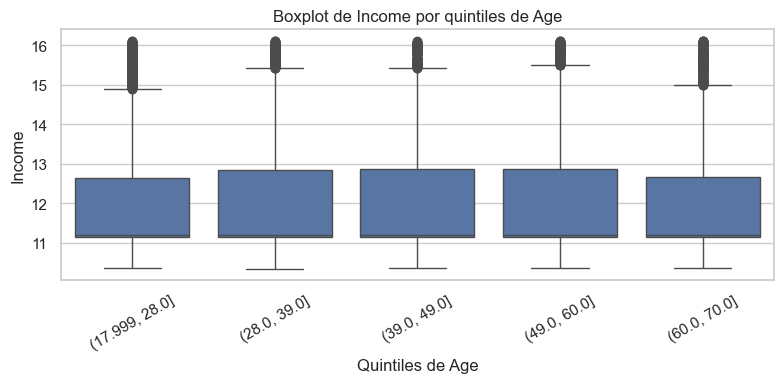

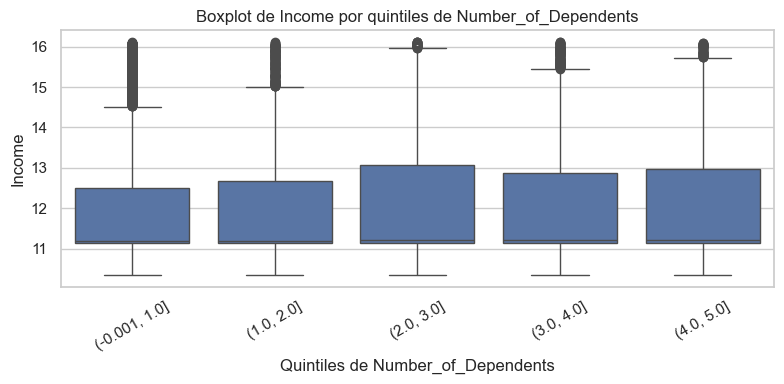

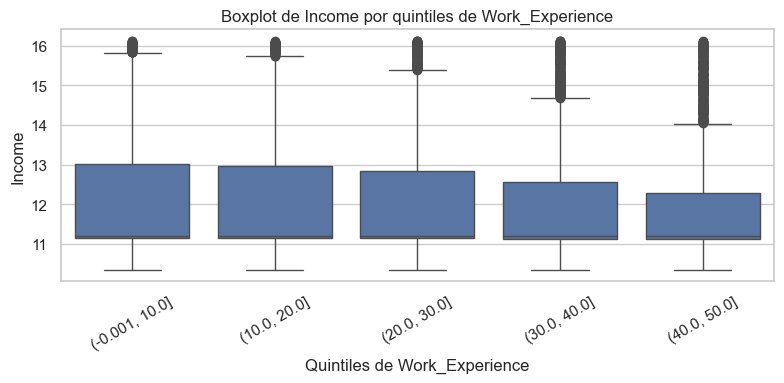

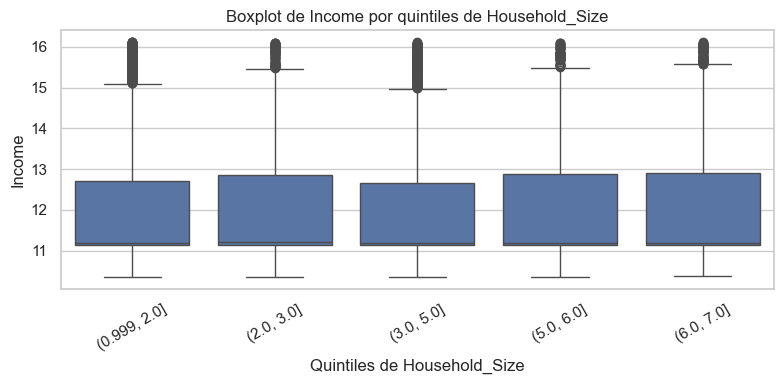

In [61]:
# Aplicar análisis a df_reg_inter y num_reg
boxplot_target_by_buckets(df_reg_inter, num_reg, TARGET_REG)



Tabla de Age (por quintiles):


C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\513625774.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket')[target].agg(['count','mean','median']).reset_index()


,bucket,count,mean,median
0,"(17.999, 28.0]",2009,12.009461,11.196858
1,"(28.0, 39.0]",2126,12.100130,11.196816
2,"(39.0, 49.0]",1920,12.056403,11.198612
3,"(49.0, 60.0]",2047,12.097520,11.201183
4,"(60.0, 70.0]",1898,12.032716,11.194770


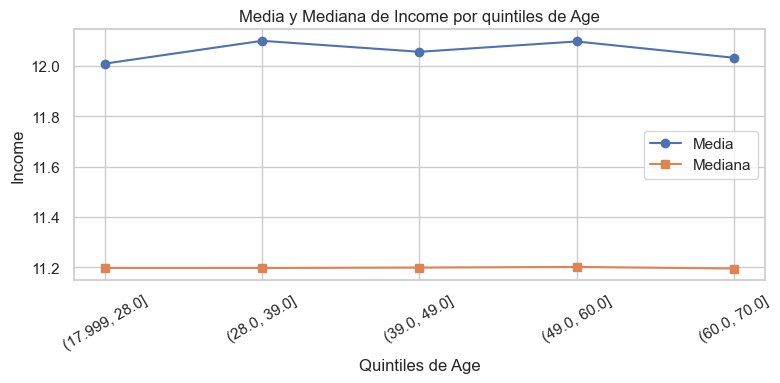


Tabla de Number_of_Dependents (por quintiles):


C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\513625774.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket')[target].agg(['count','mean','median']).reset_index()


,bucket,count,mean,median
0,"(-0.001, 1.0]",3293,12.009935,11.193615
1,"(1.0, 2.0]",1621,12.039756,11.196611
2,"(2.0, 3.0]",1712,12.132339,11.199187
3,"(3.0, 4.0]",1629,12.085868,11.201347
4,"(4.0, 5.0]",1745,12.079250,11.200445


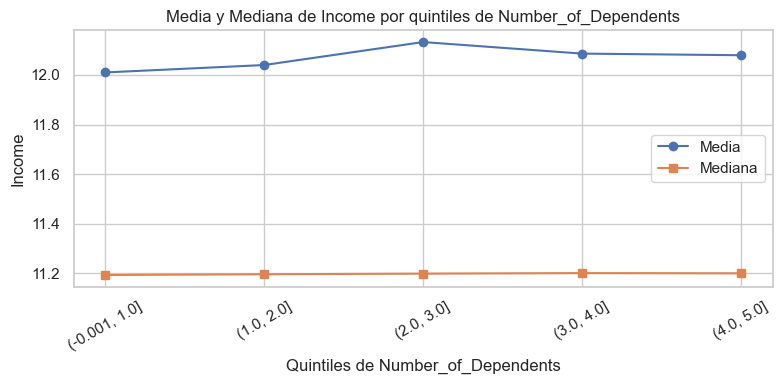


Tabla de Work_Experience (por quintiles):


C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\513625774.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket')[target].agg(['count','mean','median']).reset_index()


,bucket,count,mean,median
0,"(-0.001, 10.0]",2179,12.122196,11.205762
1,"(10.0, 20.0]",1941,12.130079,11.205897
2,"(20.0, 30.0]",2002,12.088473,11.198543
3,"(30.0, 40.0]",1987,11.998422,11.192706
4,"(40.0, 50.0]",1891,11.951962,11.186600


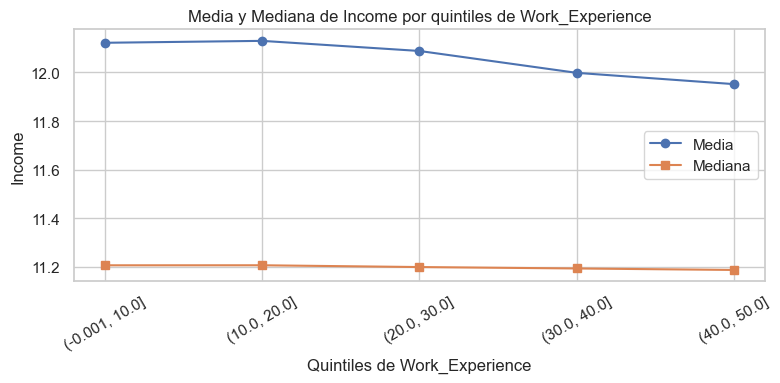


Tabla de Household_Size (por quintiles):


C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\513625774.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket')[target].agg(['count','mean','median']).reset_index()


,bucket,count,mean,median
0,"(0.999, 2.0]",2883,12.059576,11.196748
1,"(2.0, 3.0]",1445,12.084432,11.201374
2,"(3.0, 5.0]",2802,12.043545,11.198256
3,"(5.0, 6.0]",1437,12.034045,11.194605
4,"(6.0, 7.0]",1433,12.095742,11.198749


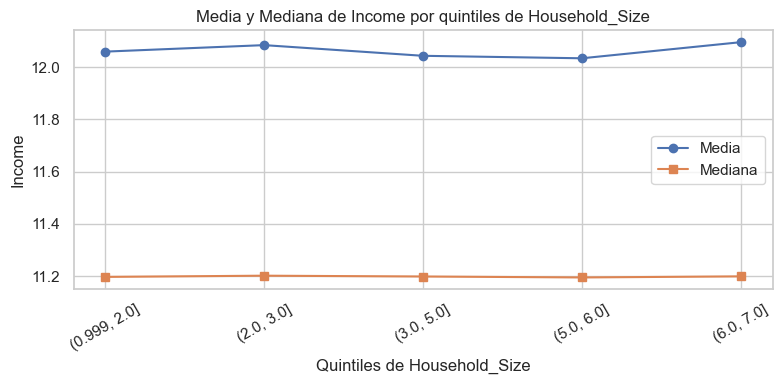

In [62]:
bucket_stats_and_trend(df_reg_inter, num_reg, TARGET_REG)


In [63]:
tendencia_buckets(df_reg_inter, num_reg, TARGET_REG)

Age: No monótona (con puntos de quiebre) | Medias por bucket: [12.01 12.1  12.06 12.1  12.03]
Number_of_Dependents: No monótona (con puntos de quiebre) | Medias por bucket: [12.01 12.04 12.13 12.09 12.08]
Work_Experience: No monótona (con puntos de quiebre) | Medias por bucket: [12.12 12.13 12.09 12.   11.95]
Household_Size: No monótona (con puntos de quiebre) | Medias por bucket: [12.06 12.08 12.04 12.03 12.1 ]


C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\154940380.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = df_temp.groupby('bucket')[target].mean().values
C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\154940380.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = df_temp.groupby('bucket')[target].mean().values
C:\Users\leydi\AppData\Local\Temp\ipykernel_48156\154940380.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

#### 5.1.2) Categóricas vs Target

In [65]:
# 1. Target medio por categoría (medir diferencias de nivel del target)
def target_medio_por_categoria(df, cat_cols, target):
    """
    Calcula media y mediana del target por categoría.
    Genera tabla y gráfico de barras.
    """
    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        stats = df_temp.groupby(col)[target].agg(['mean', 'median']).round(4)
        stats = stats.sort_values('mean', ascending=False)
        
        print(f"\n{'='*50}")
        print(f"Target medio por categoría: {col}")
        print(f"{'='*50}")
        display(stats)
        
        # Gráfico de barras (top 15 categorías)
        top_cats = stats.head(15)
        
        plt.figure(figsize=(10, 5))
        x = range(len(top_cats))
        width = 0.35
        
        plt.bar([i - width/2 for i in x], top_cats['mean'], width, label='Media', color='steelblue')
        plt.bar([i + width/2 for i in x], top_cats['median'], width, label='Mediana', color='coral')
        
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f'Media y Mediana de {target} por {col} (Top 15)')
        plt.xticks(x, top_cats.index, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [67]:
# 2. Registros por categoría (evitar conclusiones con n pequeño)
def registros_por_categoria(df, cat_cols, target):
    """
    Cuenta registros por categoría y calcula porcentaje del total.
    Detecta categorías raras.
    """
    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        conteo = df_temp.groupby(col).size().reset_index(name='n')
        conteo['pct_total'] = (conteo['n'] / conteo['n'].sum() * 100).round(2)
        conteo = conteo.sort_values('n', ascending=False)
        
        print(f"\n{'='*50}")
        print(f"Registros por categoría: {col}")
        print(f"{'='*50}")
        display(conteo)
        
        # Identificar categorías raras (< 1%)
        raras = conteo[conteo['pct_total'] < 1]
        if not raras.empty:
            print(f"\n⚠️ Categorías raras (<1%): {len(raras)} de {len(conteo)}")
            display(raras)

In [68]:
# 3. Dispersión por categoría (variabilidad del target dentro de cada grupo)
def dispersion_por_categoria(df, cat_cols, target, top_k=10):
    """
    Calcula dispersión (std, P25, P75, IQR) del target por categoría.
    Genera tabla y boxplot para top-K categorías.
    """
    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        # Estadísticos de dispersión
        stats = df_temp.groupby(col)[target].agg([
            'count', 'mean', 'std',
            lambda x: x.quantile(0.25),
            lambda x: x.quantile(0.75)
        ]).round(4)
        stats.columns = ['n', 'mean', 'std', 'P25', 'P75']
        stats['IQR'] = stats['P75'] - stats['P25']
        stats = stats.sort_values('mean', ascending=False)
        
        print(f"\n{'='*50}")
        print(f"Dispersión del target por categoría: {col}")
        print(f"{'='*50}")
        display(stats)
        
        # Boxplot para top-K categorías (por frecuencia)
        top_cats = df_temp[col].value_counts().head(top_k).index.tolist()
        df_top = df_temp[df_temp[col].isin(top_cats)]
        
        plt.figure(figsize=(12, 5))
        order = df_top.groupby(col)[target].mean().sort_values(ascending=False).index
        sns.boxplot(data=df_top, x=col, y=target, order=order)
        plt.title(f'Boxplot de {target} por {col} (Top {top_k} categorías)')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

5.1.2) CATEGÓRICAS vs TARGET

Target medio por categoría: Education_Level


,mean,median
Education_Level,,
High School,12.1223,11.2044
Bachelor's,12.0623,11.1967
Master's,12.0373,11.1948
Doctorate,11.7898,11.1753


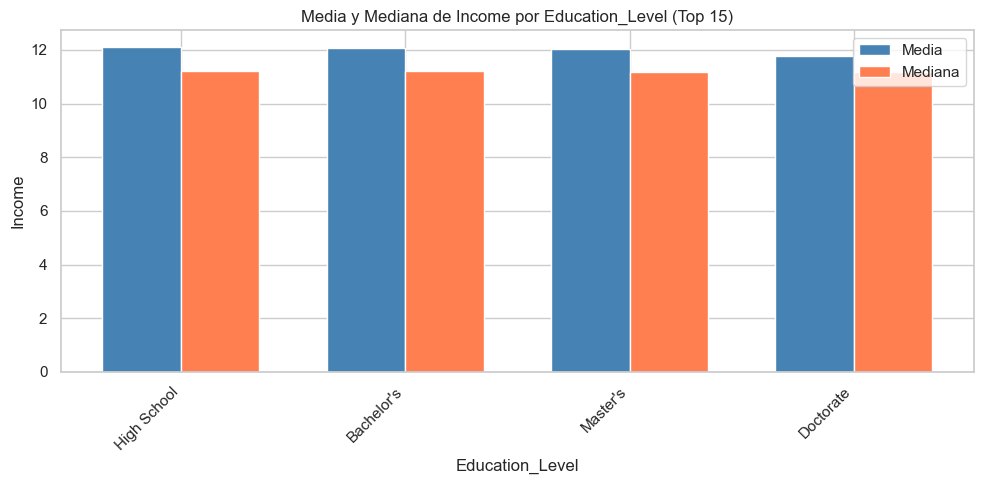


Target medio por categoría: Occupation


,mean,median
Occupation,,
Education,12.1696,11.2026
Others,12.0963,11.2041
Healthcare,12.0670,11.2002
Technology,12.0357,11.1934
Finance,11.9408,11.1876


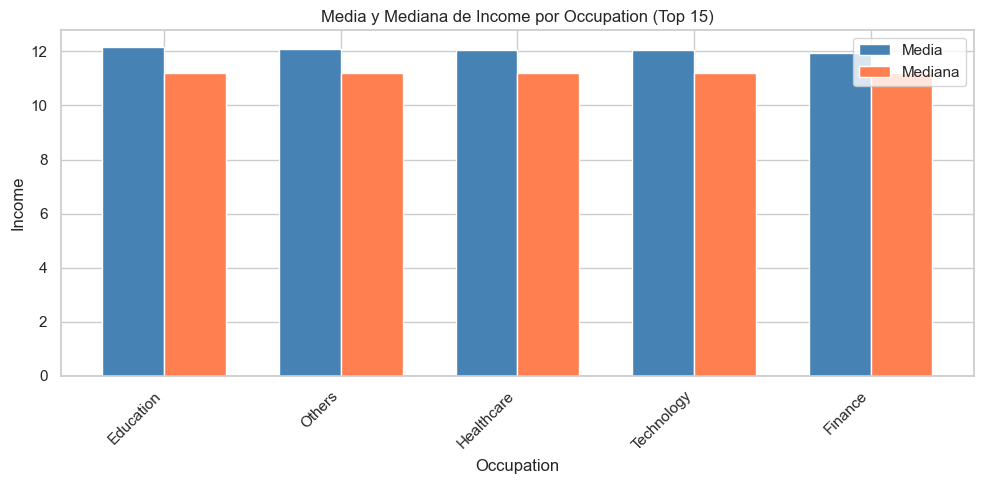


Target medio por categoría: Location


,mean,median
Location,,
Rural,12.3562,11.2228
Suburban,12.1473,11.2009
Urban,11.9935,11.1936


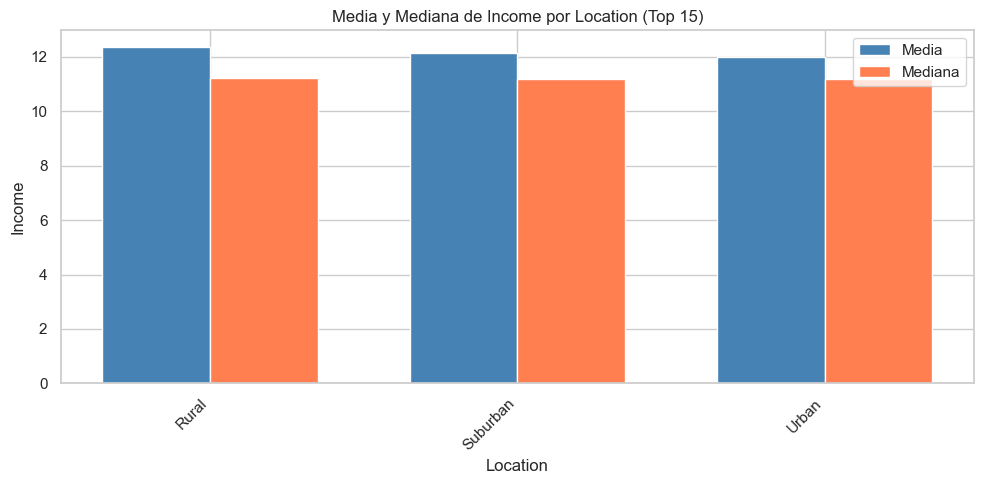


Target medio por categoría: Marital_Status


,mean,median
Marital_Status,,
Married,12.0755,11.1971
Divorced,12.0491,11.1998
Single,12.0427,11.1974


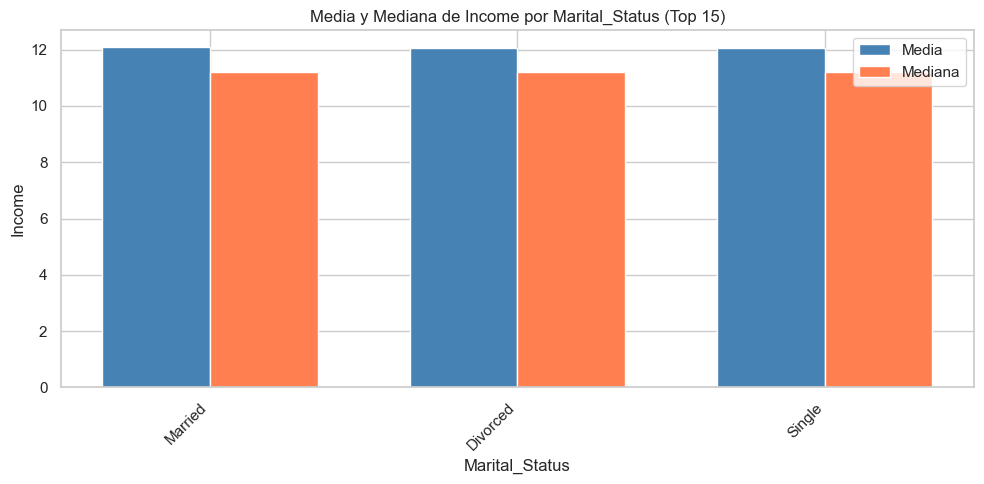


Target medio por categoría: Employment_Status


,mean,median
Employment_Status,,
Part-time,12.1460,11.2052
Full-time,12.0405,11.1956
Self-employed,11.9794,11.1930


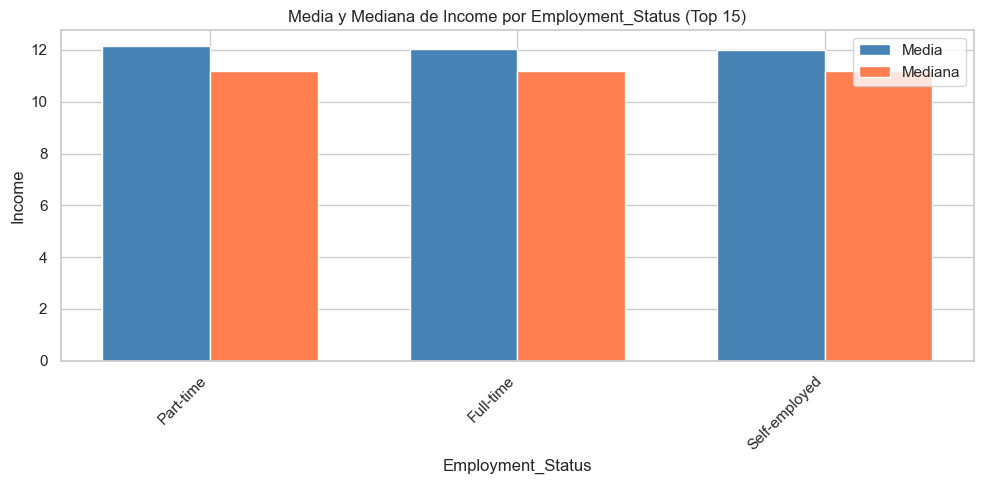


Target medio por categoría: Homeownership_Status


,mean,median
Homeownership_Status,,
Rent,12.3287,11.2296
Own,11.8825,11.1833


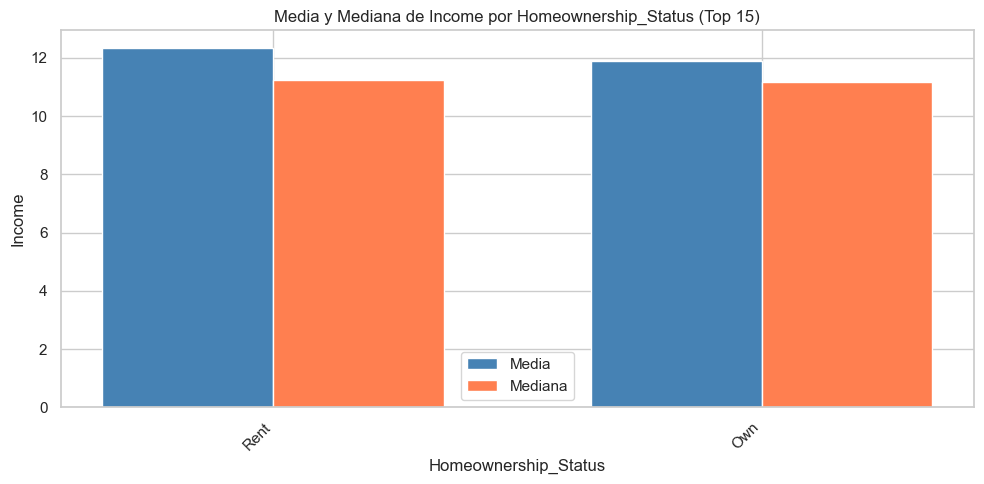


Target medio por categoría: Type_of_Housing


,mean,median
Type_of_Housing,,
Apartment,12.1374,11.2058
Single-family home,12.0308,11.1935
Townhouse,11.9626,11.1924


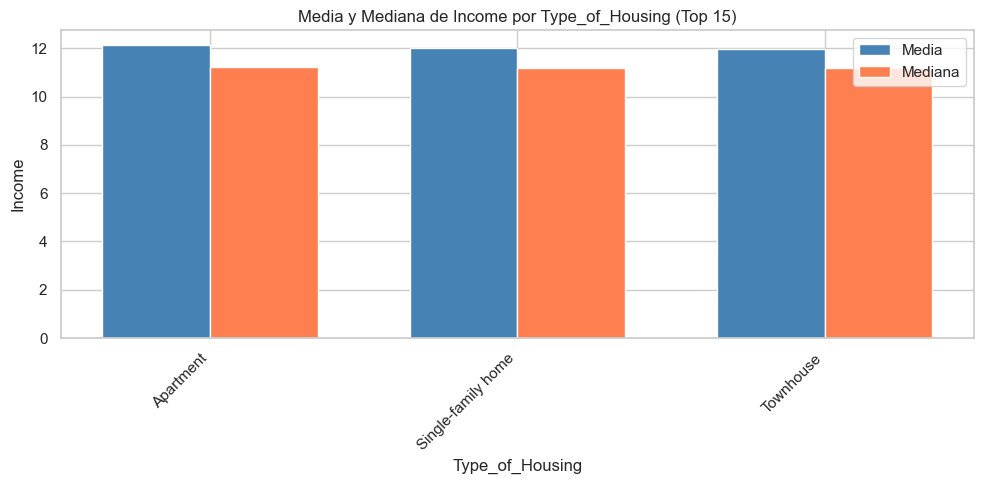


Target medio por categoría: Gender


,mean,median
Gender,,
Male,12.0675,11.1996
Female,12.0525,11.1955


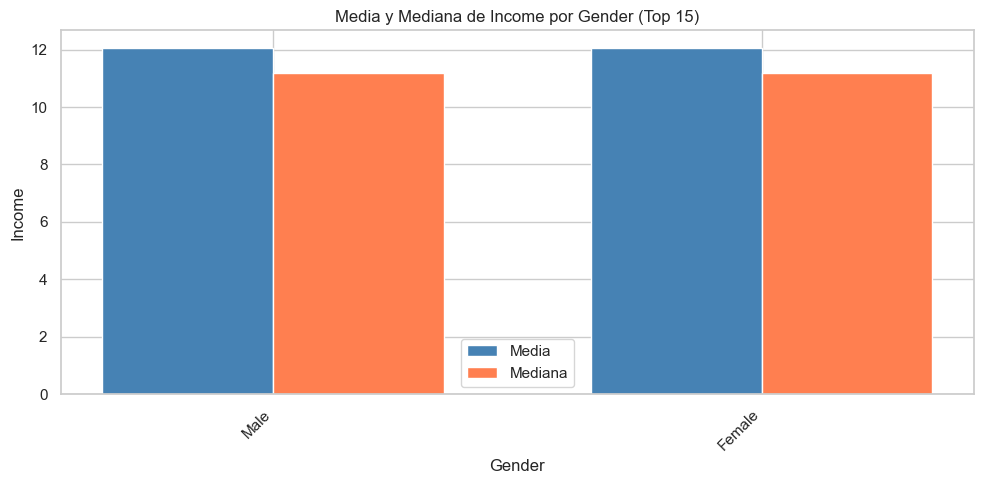


Target medio por categoría: Primary_Mode_of_Transportation


,mean,median
Primary_Mode_of_Transportation,,
Biking,12.0885,11.2015
Walking,12.0816,11.1976
Public transit,12.0583,11.1960
Car,12.0370,11.1974


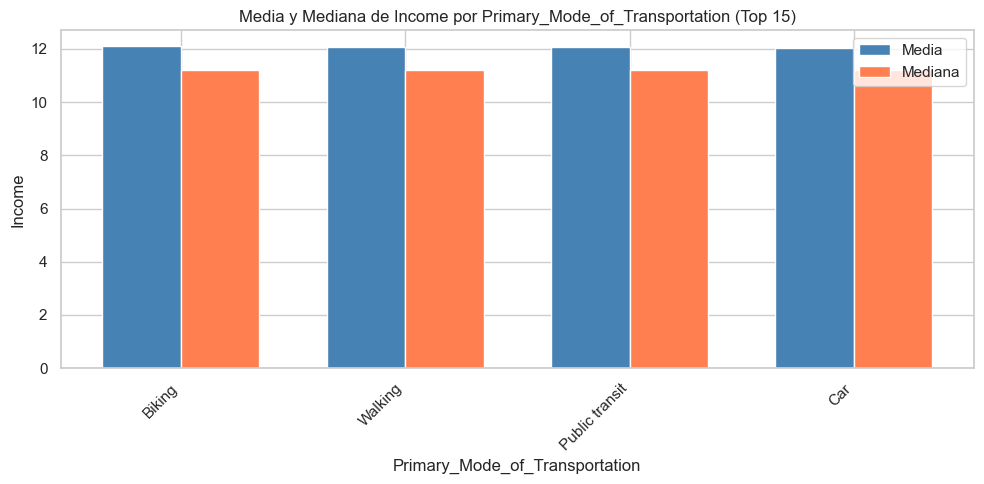

In [69]:
# Aplicar análisis de categóricas vs target
print("="*60)
print("5.1.2) CATEGÓRICAS vs TARGET")
print("="*60)

target_medio_por_categoria(df_reg_inter, cat_reg, TARGET_REG)

In [70]:
registros_por_categoria(df_reg_inter, cat_reg, TARGET_REG)


Registros por categoría: Education_Level


,Education_Level,n,pct_total
0,Bachelor's,4058,40.58
2,High School,2959,29.59
3,Master's,2482,24.82
1,Doctorate,501,5.01



Registros por categoría: Occupation


,Occupation,n,pct_total
2,Healthcare,3035,30.35
4,Technology,2407,24.07
1,Finance,1525,15.25
3,Others,1521,15.21
0,Education,1512,15.12



Registros por categoría: Location


,Location,n,pct_total
2,Urban,7037,70.37
1,Suburban,1951,19.51
0,Rural,1012,10.12



Registros por categoría: Marital_Status


,Marital_Status,n,pct_total
1,Married,5136,51.36
2,Single,3900,39.00
0,Divorced,964,9.64



Registros por categoría: Employment_Status


,Employment_Status,n,pct_total
0,Full-time,5004,50.04
1,Part-time,3016,30.16
2,Self-employed,1980,19.80



Registros por categoría: Homeownership_Status


,Homeownership_Status,n,pct_total
0,Own,6018,60.18
1,Rent,3982,39.82



Registros por categoría: Type_of_Housing


,Type_of_Housing,n,pct_total
1,Single-family home,4055,40.55
0,Apartment,4001,40.01
2,Townhouse,1944,19.44



Registros por categoría: Gender


,Gender,n,pct_total
1,Male,5123,51.23
0,Female,4877,48.77



Registros por categoría: Primary_Mode_of_Transportation


,Primary_Mode_of_Transportation,n,pct_total
2,Public transit,4047,40.47
1,Car,2986,29.86
0,Biking,1940,19.40
3,Walking,1027,10.27



Dispersión del target por categoría: Education_Level


,n,mean,std,P25,P75,IQR
Education_Level,,,,,,
High School,2959,12.1223,1.5573,11.1372,13.0052,1.8680
Bachelor's,4058,12.0623,1.5173,11.1328,12.8157,1.6829
Master's,2482,12.0373,1.5088,11.1330,12.6605,1.5275
Doctorate,501,11.7898,1.3803,11.1205,11.2305,0.1100


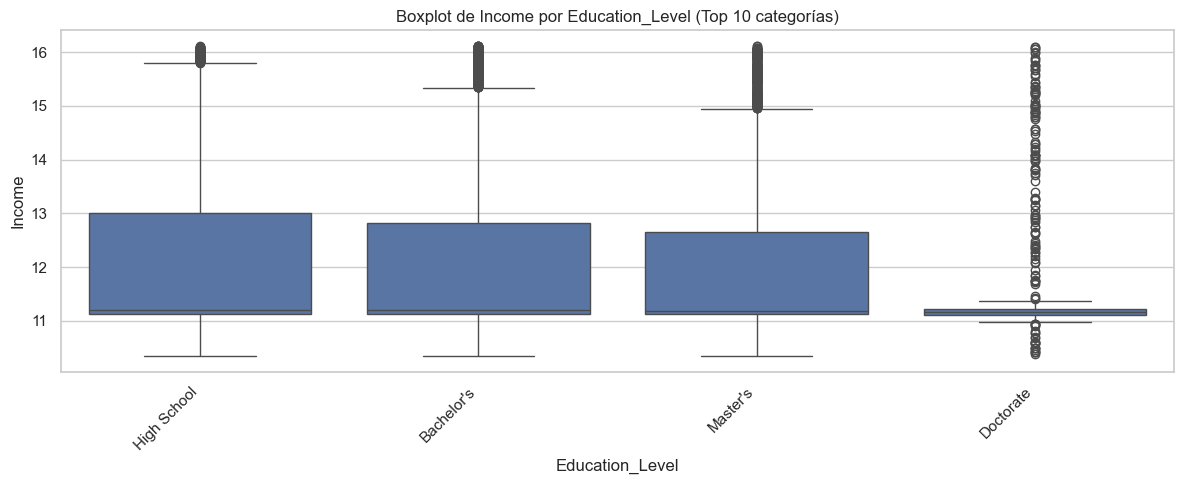


Dispersión del target por categoría: Occupation


,n,mean,std,P25,P75,IQR
Occupation,,,,,,
Education,1512,12.1696,1.5809,11.1378,13.2236,2.0858
Others,1521,12.0963,1.5371,11.1332,12.9308,1.7976
Healthcare,3035,12.0670,1.5039,11.1369,12.8275,1.6906
Technology,2407,12.0357,1.5345,11.1304,12.5775,1.4471
Finance,1525,11.9408,1.4548,11.1291,12.1314,1.0023


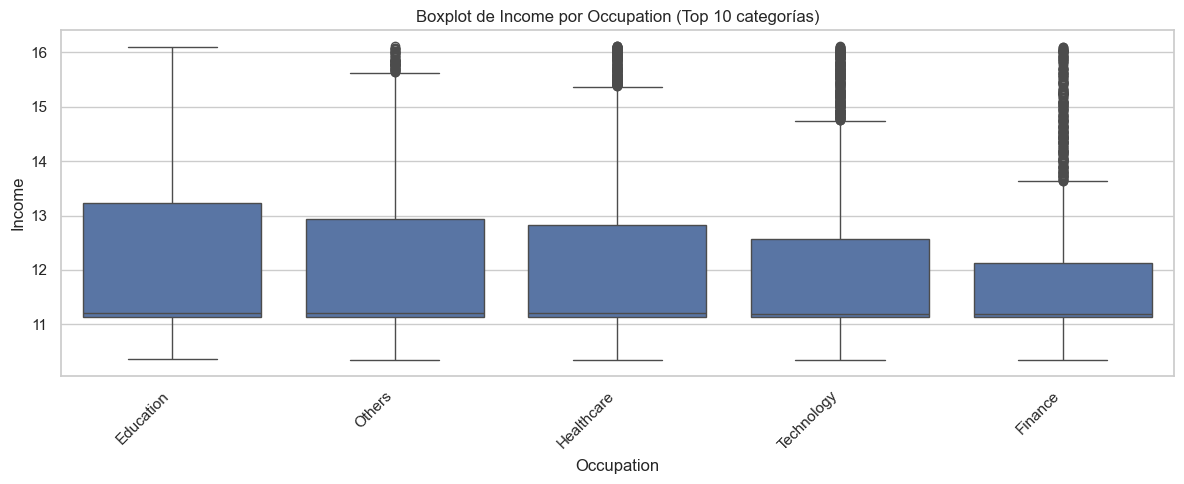


Dispersión del target por categoría: Location


,n,mean,std,P25,P75,IQR
Location,,,,,,
Rural,1012,12.3562,1.6440,11.1402,13.6381,2.4979
Suburban,1951,12.1473,1.5849,11.1365,13.1078,1.9713
Urban,7037,11.9935,1.4793,11.1321,12.5100,1.3779


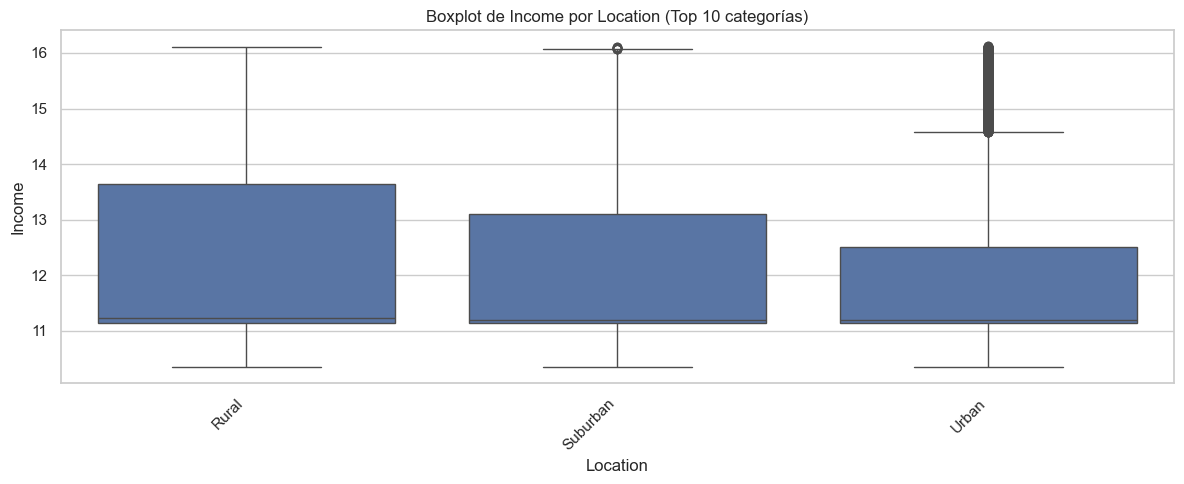


Dispersión del target por categoría: Marital_Status


,n,mean,std,P25,P75,IQR
Marital_Status,,,,,,
Married,5136,12.0755,1.5359,11.1340,12.7592,1.6252
Divorced,964,12.0491,1.5107,11.1348,12.8125,1.6777
Single,3900,12.0427,1.5066,11.1332,12.7529,1.6197


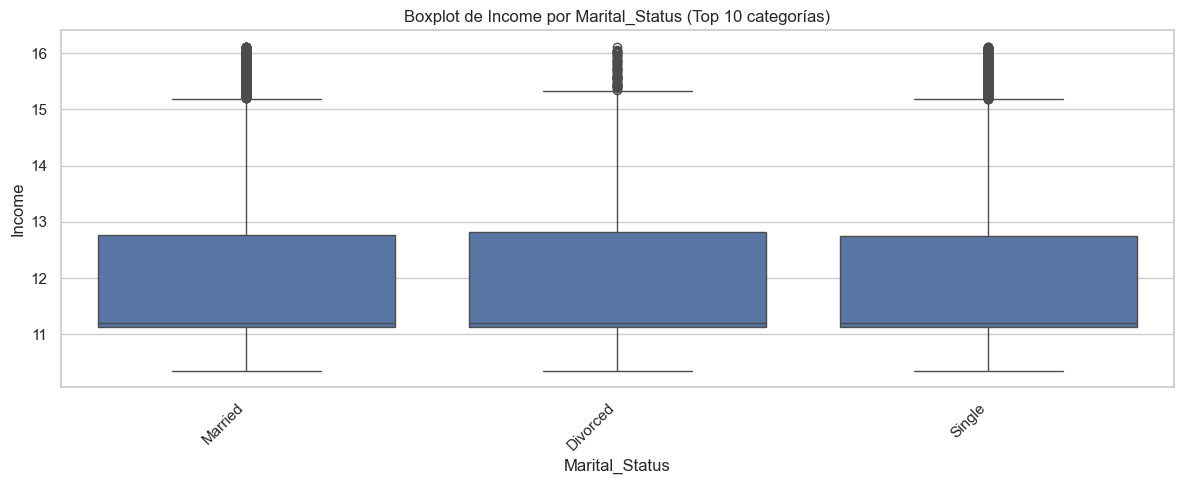


Dispersión del target por categoría: Employment_Status


,n,mean,std,P25,P75,IQR
Employment_Status,,,,,,
Part-time,3016,12.1460,1.5733,11.1384,13.0205,1.8821
Full-time,5004,12.0405,1.5003,11.1319,12.7430,1.6111
Self-employed,1980,11.9794,1.4915,11.1313,12.3938,1.2625


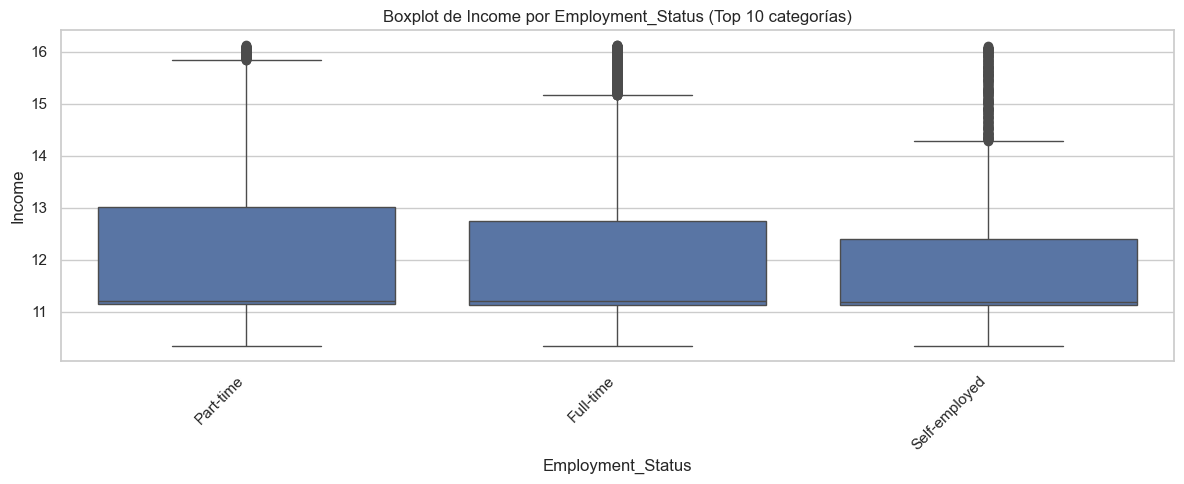


Dispersión del target por categoría: Homeownership_Status


,n,mean,std,P25,P75,IQR
Homeownership_Status,,,,,,
Rent,3982,12.3287,1.5868,11.1457,13.4978,2.3521
Own,6018,11.8825,1.4507,11.1278,11.6209,0.4931


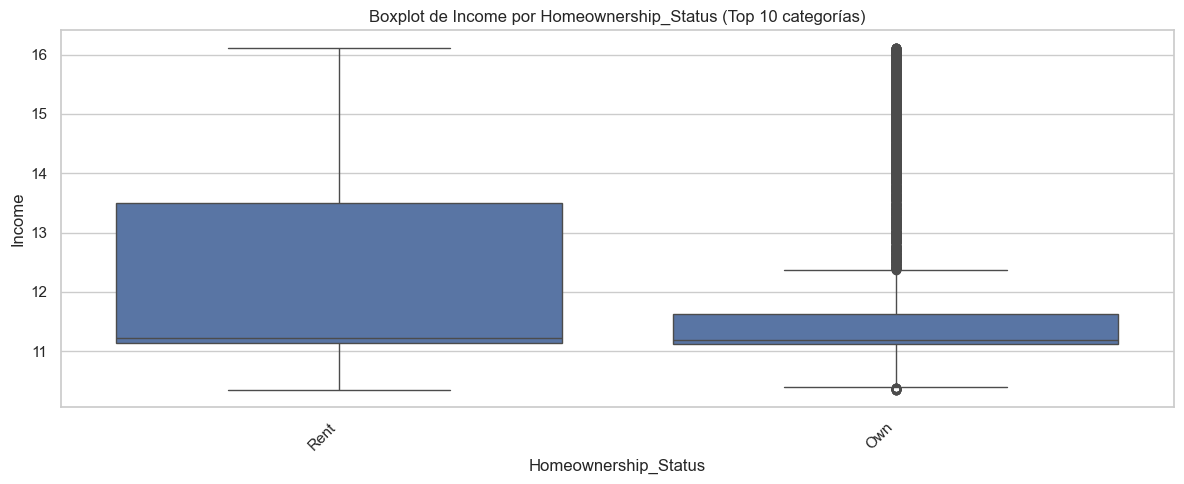


Dispersión del target por categoría: Type_of_Housing


,n,mean,std,P25,P75,IQR
Type_of_Housing,,,,,,
Apartment,4001,12.1374,1.5542,11.1370,13.0102,1.8732
Single-family home,4055,12.0308,1.5123,11.1301,12.6655,1.5354
Townhouse,1944,11.9626,1.4674,11.1339,12.2722,1.1383


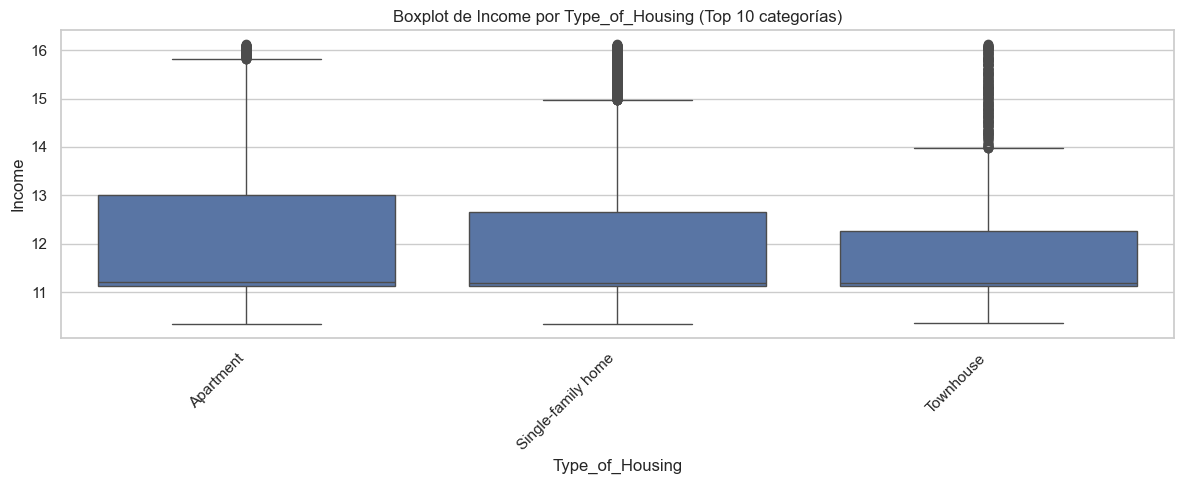


Dispersión del target por categoría: Gender


,n,mean,std,P25,P75,IQR
Gender,,,,,,
Male,5123,12.0675,1.5183,11.1353,12.8304,1.6951
Female,4877,12.0525,1.5261,11.1321,12.7116,1.5795


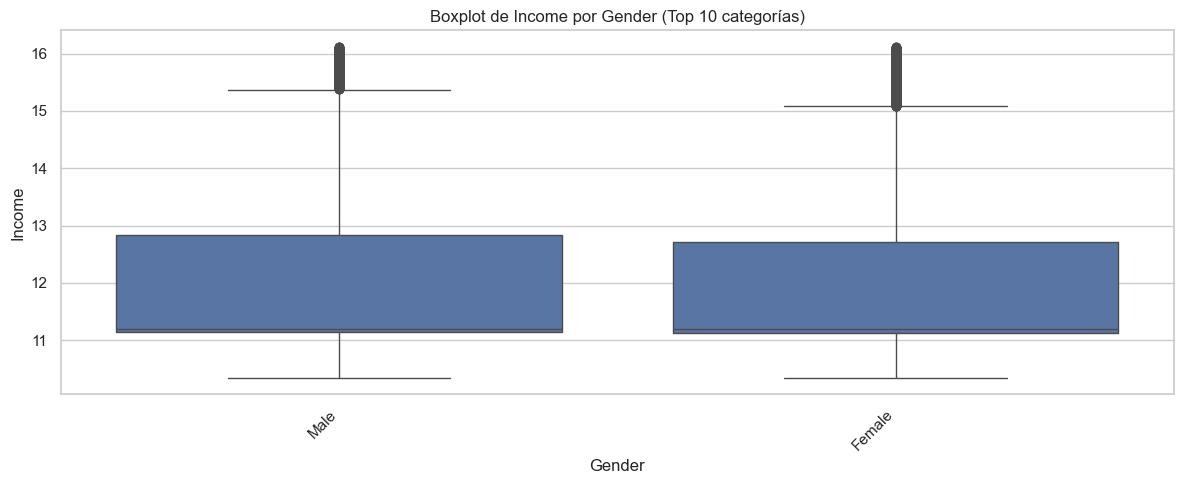


Dispersión del target por categoría: Primary_Mode_of_Transportation


,n,mean,std,P25,P75,IQR
Primary_Mode_of_Transportation,,,,,,
Biking,1940,12.0885,1.5369,11.1344,12.8278,1.6934
Walking,1027,12.0816,1.5351,11.1294,12.8873,1.7579
Public transit,4047,12.0583,1.5255,11.1348,12.7534,1.6186
Car,2986,12.0370,1.5034,11.1338,12.7109,1.5771


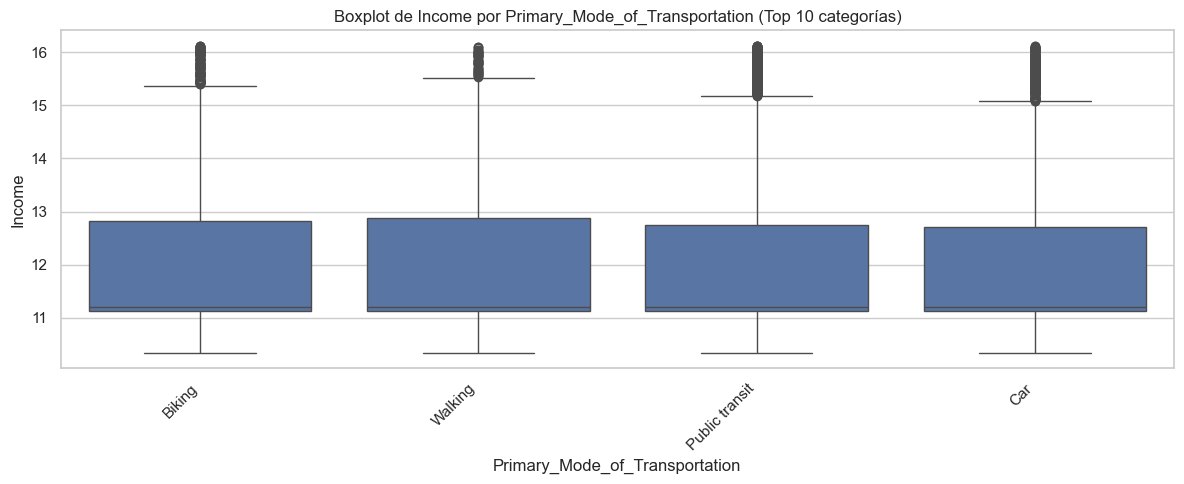

In [71]:
dispersion_por_categoria(df_reg_inter, cat_reg, TARGET_REG)